In [2]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259


In [3]:
confirmed.shape

(280, 689)

In [4]:
last_date = "12/2/21"

confirmed[last_date]

0       157387
1       200639
2       210921
3        17658
4        65208
        ...   
275    1266288
276     461157
277      10006
278     210220
279     136379
Name: 12/2/21, Length: 280, dtype: int64

In [5]:
confirmed["Country/Region"]

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
275               Vietnam
276    West Bank and Gaza
277                 Yemen
278                Zambia
279              Zimbabwe
Name: Country/Region, Length: 280, dtype: object

In [6]:
confirmed["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [7]:
#linhas
confirmed.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
12/2/21            200639
12/3/21            201045
12/4/21            201402
12/5/21            201730
12/6/21            201902
Name: 1, Length: 689, dtype: object

In [8]:
#índices
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
12/2/21              1008
12/3/21              1008
12/4/21              1008
12/5/21              1008
12/6/21              1008
Name: Anhui, Length: 688, dtype: object

In [9]:
 # valor falso pois o erro é muito grande
 # não vou considerar essa analise pois tem muito campo vazio (muita disparidade no padrão)

confirmed["Country/Region"].value_counts()

China                  34
Canada                 16
United Kingdom         12
France                 12
Australia               8
                       ..
Brazil                  1
Congo (Kinshasa)        1
Bhutan                  1
Namibia                 1
Trinidad and Tobago     1
Name: Country/Region, Length: 196, dtype: int64

In [10]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()

confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259


In [11]:
confirmed_by_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Diamond Princess,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,691,691,705,705,705,...,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712
Czechia,49.817500,15.473000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1747701,1752086,1757821,1762902,1765654,1773291,1783227,1792707,1801154,1810395,1816161,1819158,1828440,1843019,1856555,1866969,1881206,1890405,1896075,1907629,1930214,1944400,1957816,1980849,1995291,2018069,2018069,2044018,2062064,2089857,2110274,2132380,2132380,2150042,2172084,2193289,2211972,2229715,2240721,2247067
Gambia,13.443200,-15.310100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9963,9965,9965,9965,9967,9973,9973,9973,9973,9973,9973,9973,9979,9980,9980,9980,9980,9980,9980,9986,9986,9986,9986,9986,9988,9988,9988,9988,9989,9989,9989,9989,9989,9989,9989,9992,9992,9992,9992,9998
Fiji,-17.713400,178.065000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52079,52141,52141,52141,52180,52180,52209,52209,52247,52247,52247,52298,52298,52356,52356,52397,52397,52397,52429,52429,52444,52444,52453,52453,52453,52468,52468,52474,52474,52494,52494,52494,52506,52506,52532,52532,52543,52543,52543,52562
Iceland,64.963100,-19.020800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,13413,13492,13492,13492,13739,13829,13923,14087,14255,14255,14255,14571,14757,14935,15140,15321,15321,15321,15741,15968,16113,16243,16435,16435,16435,16800,17002,17152,17294,17446,17446,17446,17770,17894,18055,18198,18333,18333,18333,18642
Liechtenstein,47.140000,9.550000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3653,3662,3662,3662,3662,3685,3699,3708,3728,3728,3728,3738,3781,3814,3841,3846,3846,3846,3877,3945,4003,4041,4131,4131,4144,4321,4321,4396,4432,4477,4477,4507,4562,4678,4745,4809,4862,4862,4893,4941
Japan,36.204824,138.252924,2,2,2,2,4,4,7,7,11,15,20,20,20,22,23,23,23,24,24,26,27,28,33,43,54,60,67,79,85,95,112,137,149,160,173,192,218,236,...,1721539,1721831,1722115,1722343,1722427,1722648,1722912,1723070,1723295,1723525,1723682,1723782,1723976,1724172,1724379,1724573,1724767,1724893,1724967,1725111,1725310,1725458,1725611,1725715,1725850,1725894,1726001,1726074,1726186,1726299,1726419,1726479,1726555,1726636,1726751,1726864,1727005,1727125,1727229,1727283
Barbados,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16782,17151,17465,17763,18023,18459,18852,19188,19516,19831,20069,20265,20676,21011,21311,21595,21877,22093,22316,22639,22923,23175,23426,23623,23795,23944,24234,24432,24432,24769,24769,24923,25152,25316,25429,25627,25792,25964,26095,26200
Congo (Brazzaville),-0.228000,15.827700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17323,17323,17323,17323,17670,17670,17670,17944,17944,17944,17944,18153,18153,18153,18153,18153,18153,18153,18390,18539,18539,18539,18717,18717,18717,18717,18837,18837,18837,18837,18837,18837,18905,18970,18970,18970,18970,18970,18970,18970


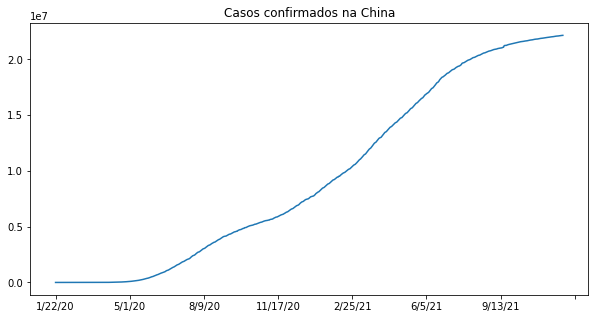

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

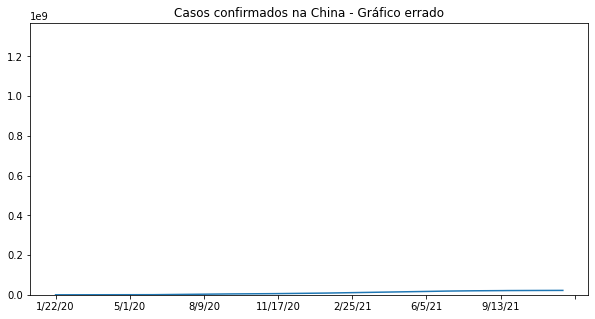

In [13]:
# mensagem diferente utilizando a população como referência
# população china 2017 (1.368 bi)

plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados na China - Gráfico errado")
plt.ylim(0, 1368000000)
plt.show()

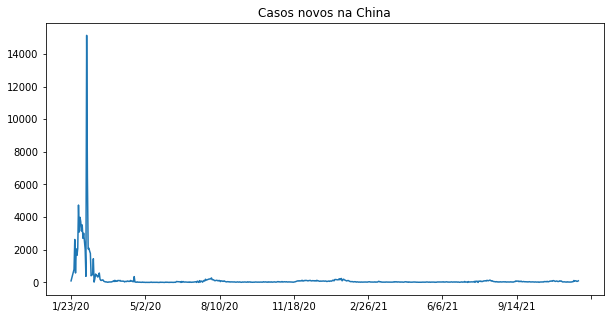

In [14]:
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()


plt.figure(figsize=(10,5))
plt.title("Casos novos na China")
new_cases_china.plot()

Text(0.5, 1.0, 'Casos confirmados por país')

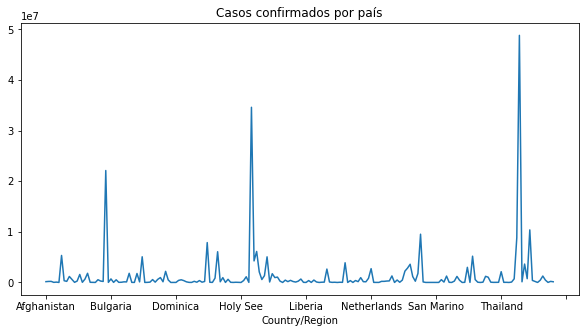

In [15]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].plot()
plt.title("Casos confirmados por país")

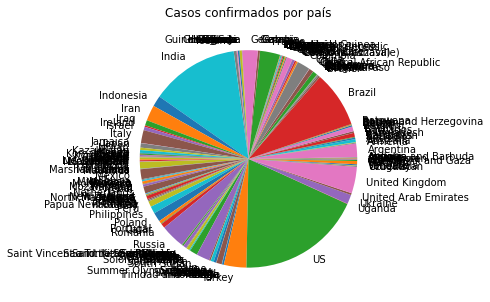

In [16]:
plt.figure(figsize=(10,5))

#99.99% não se usa gráfico de pizza e torta
# 1. muitas categorias é inviavel
# 2. poucas categorias, é uma comparação de area!

confirmed_by_country[last_date].plot(kind='pie')
plt.title("Casos confirmados por país")
plt.show()

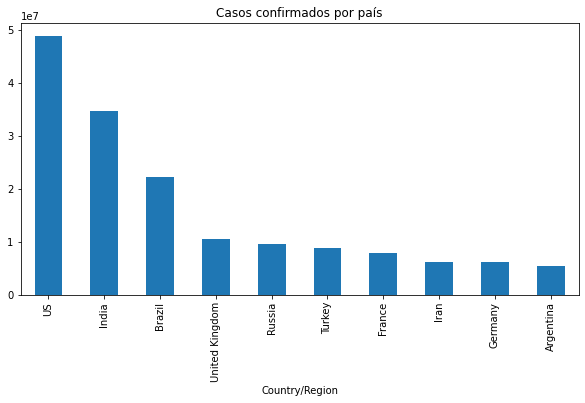

In [17]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Casos confirmados por país")
plt.show()

Estados Unidos lidera em número de casos confirmados, seguidos por India e Brasil

In [41]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")


display(deaths)
display(recovered)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312,7316
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110,3115
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103,6111
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131,131,132,132,132,132,133
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21910,21966,22030,22083,22131,22205,22283,22342,22412,22470,22531,22598,22686,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578,23685,23761,23951,24118,24243,24407,24544,24692,24882,25055,25252,25448,25658,25858,26061,26260,26483
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4657,4663,4663,4663,4681,4689,4694,4697,4705,4705,4705,4724,4731,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770,4770,4770,4779,4781,4783,4788,4789,4789,4789,4796,4796,4803,4806,4810,4810,4810,4817
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1874,1877,1880,1889,1890,1894,1897,1901,1905,1907,1909,1909,1915,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935,1938,1938,1939,1942,1942,1943,1943,1945,1946,1949,1950,1950,1950,1952,1953,1954,1955
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3660,3660,3661,3661,3661,3661,3661,3662,3662,3663,3664,3664,3664,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3668


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]


display(latest_by_country(confirmed).head())
display(latest_by_country(deaths).head())
display(latest_by_country(recovered).head())

Country/Region
Afghanistan    157499
Albania        201902
Algeria        211662
Andorra         18631
Angola          65259
Name: 12/6/21, dtype: int64

Country/Region
Afghanistan    7316
Albania        3115
Algeria        6111
Andorra         133
Angola         1735
Name: 12/6/21, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 12/6/21, dtype: int64

In [44]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,157499,7316,0
Albania,201902,3115,0
Algeria,211662,6111,0
Andorra,18631,133,0
Angola,65259,1735,0
...,...,...,...
Vietnam,1323683,26483,0
West Bank and Gaza,462219,4817,0
Yemen,10034,1955,0


In [70]:
# taxa de letalidade é expressa em %
# o número de casos letais dentro dfos casos que foram letais e não letais

# muito dificil falar de letalidade tentando ser preciso durante uma epidemia

# no começo é comum que somente casos graves sejam reportados

sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up['deaths']+sum_up['recovered'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)


1.975025269341834
100.0


In [82]:
# escolhendo a data para calcular as taxas

def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]

informations = [latest_by_country_at(confirmed, '12/1/21'), latest_by_country_at(deaths, '12/1/21'), latest_by_country_at(recovered, '12/1/21')]
combined_12_21 = pd.concat(informations, axis=1)
combined_12_21.columns = ['confirmed', 'deaths', 'recovered']

sum_up = combined_12_21.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up['deaths']+sum_up['recovered'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

1.9827159310287414
100.0


In [71]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
letality_rate_2 = combined['deaths'] / combined["recovered"] + combined["deaths"] * 100
combined['letality_rate_1'] = letality_rate_1
combined['letality_rate_2'] = letality_rate_2

combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,157499,7316,0,4.645109,inf
Albania,201902,3115,0,1.542828,inf
Algeria,211662,6111,0,2.887150,inf
Andorra,18631,133,0,0.713864,inf
Angola,65259,1735,0,2.658637,inf


In [72]:
combined.sort_values("letality_rate_1", ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,inf
Yemen,10034,1955,0,19.483755,inf
Vanuatu,6,1,0,16.666667,inf
Peru,2243415,201379,0,8.976449,inf
Mexico,3901263,295203,0,7.566857,inf
Sudan,44170,3200,0,7.244736,inf
Ecuador,529349,33484,0,6.325505,inf
Somalia,23051,1331,0,5.774153,inf
Syria,48709,2782,0,5.711470,inf


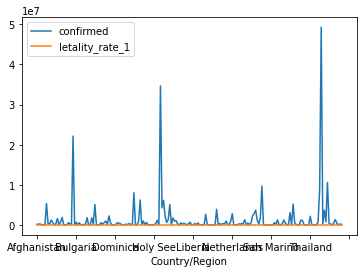

In [73]:
# visualização ruim

combined[["confirmed", 'letality_rate_1']].plot()

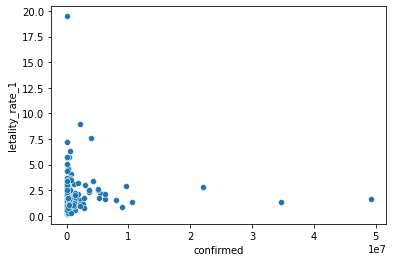

In [74]:
import seaborn as sns

sns.scatterplot(data=combined.query("confirmed > 10000"), x ='confirmed', y='letality_rate_1')

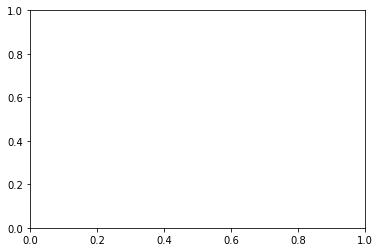

In [75]:
sns.scatterplot(data=combined.query("recovered > 50"), x ='confirmed', y='letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


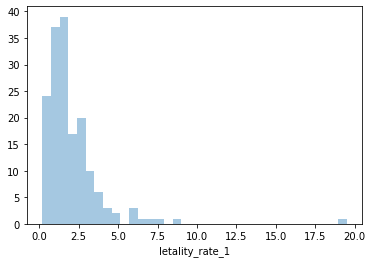

In [76]:
sns.distplot(combined.query("confirmed > 10000")['letality_rate_1'], kde=False)

In [77]:
combined.sort_values("letality_rate_1", ascending = False).query("confirmed > 10000").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,10034,1955,0,19.483755,inf
Peru,2243415,201379,0,8.976449,inf
Mexico,3901263,295203,0,7.566857,inf
Sudan,44170,3200,0,7.244736,inf
Ecuador,529349,33484,0,6.325505,inf
Somalia,23051,1331,0,5.774153,inf
Syria,48709,2782,0,5.711470,inf
Egypt,364033,20770,0,5.705527,inf
Taiwan*,16662,848,0,5.089425,inf
